In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN, SMOTENC
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# NEW DISTRIBUTION

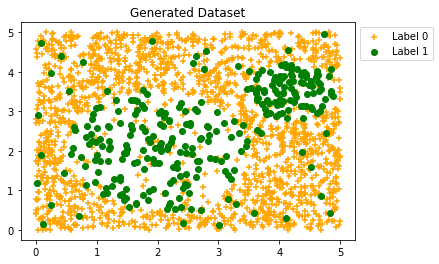

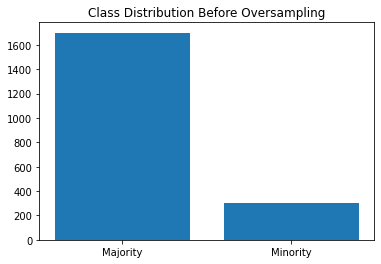

In [2]:

# Define Parameters
num_samples = 2000
majority_class_Outratio = 0.8
majority_class_Inratio = 0.05 
circle_radius_large = 1.5
circle_radius_small = 0.75
circle_centre_large = [2.0, 2.0]
circle_centre_small = [4.2, 3.5]
minority_density_large = 0.08
minority_density_small = 0.05
minority_density_out = 0.02

# Making plot
x = np.linspace(0, 5, 500)
y = np.linspace(0, 5, 500)
xx, yy = np.meshgrid(x, y)
points = np.column_stack((xx.ravel(), yy.ravel()))

# Calculate distances from circle centers
distance_to_large = np.sqrt((points[:, 0] - circle_centre_large[0])**2 + (points[:, 1] - circle_centre_large[1])**2)
distance_to_small = np.sqrt((points[:, 0] - circle_centre_small[0])**2 + (points[:, 1] - circle_centre_small[1])**2)

# Generating majority class samples
valid_indices = np.where((distance_to_large >= circle_radius_large) & (distance_to_small >= circle_radius_small))[0]
num_majority_samples = int(num_samples * majority_class_Outratio)
majority_out_samples = points[np.random.choice(valid_indices, num_majority_samples, replace=False)]

num_minority_samples = int(num_samples * minority_density_out)
minority_out_samples = points[np.random.choice(valid_indices, num_minority_samples, replace=False)]
# print(minority_out_samples.shape)

valid_indices = np.where((distance_to_large < circle_radius_large) | (distance_to_small < circle_radius_small))[0]
num_majority_samples = int(num_samples * majority_class_Inratio)
majority_in_samples = points[np.random.choice(valid_indices, num_majority_samples, replace=False)]

# Generating minority class samples in largee circle
num_minority_large = int(num_samples * minority_density_large)
angle_large = np.random.rand(num_minority_large) * 2 * np.pi
radius_large = np.sqrt(np.random.rand(num_minority_large)) * circle_radius_large
minority_samples_large = np.column_stack((circle_centre_large[0] + radius_large * np.cos(angle_large), circle_centre_large[1] + radius_large * np.sin(angle_large)))

# Generate minority class samples in small circle
num_minority_small = int(num_samples * minority_density_small)
angle_small = np.random.rand(num_minority_small) * 2 * np.pi
radius_small = np.sqrt(np.random.rand(num_minority_small)) * circle_radius_small
minority_samples_small = np.column_stack((circle_centre_small[0] + radius_small * np.cos(angle_small), circle_centre_small[1] + radius_small * np.sin(angle_small)))

# Combine all samples
samples = np.vstack((majority_out_samples, majority_in_samples, minority_samples_large, minority_samples_small, minority_out_samples))
labels = np.array([0] * len(majority_out_samples) + [0] * len(majority_in_samples) + [1] * len(minority_samples_large) +
         [1] * len(minority_samples_small) + [1] * len(minority_out_samples))

# Plotting
cmap = plt.get_cmap('viridis')
markers = ['+', 'o']

for label in np.unique(labels):
    mask = labels == label
    color = 'orange' if label == 0 else 'green'
    plt.scatter(samples[mask, 0], samples[mask, 1], c=color, marker=markers[label], label=f'Label {label}')

plt.title("Generated Dataset")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

class_distribution_before = np.bincount(labels)
plt.bar(['Majority', 'Minority'], class_distribution_before)
plt.title("Class Distribution Before Oversampling")
plt.show()

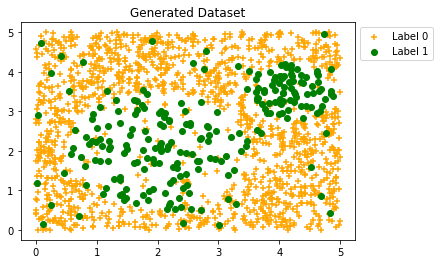

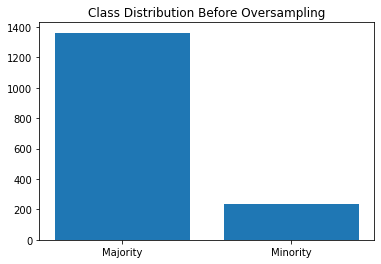

[1362  238]


In [3]:
# Split the data into training and testing sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.2, random_state=42)

for label in np.unique(y_train):
    mask = y_train == label
    color = 'orange' if label == 0 else 'green'
    plt.scatter(X_train[mask, 0], X_train[mask, 1], c=color, marker=markers[label], label=f'Label {label}')

plt.title("Generated Dataset")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

class_distribution_before = np.bincount(y_train)
plt.bar(['Majority', 'Minority'], class_distribution_before)
plt.title("Class Distribution Before Oversampling")
plt.show()
print(class_distribution_before)

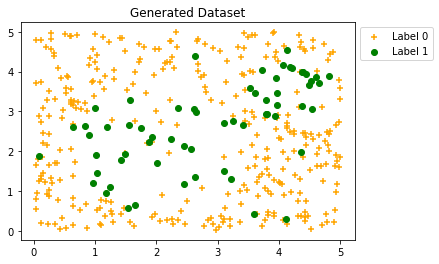

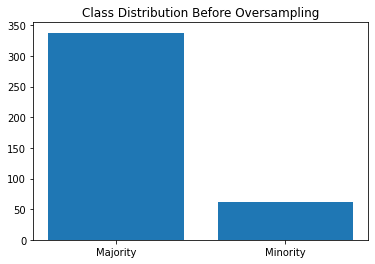

[338  62]
              precision    recall  f1-score   support

    Majority       0.88      0.97      0.92       338
    Minority       0.64      0.26      0.37        62

    accuracy                           0.86       400
   macro avg       0.76      0.62      0.65       400
weighted avg       0.84      0.86      0.84       400

Accuracy: 0.86


In [4]:
for label in np.unique(y_test):
    mask = y_test == label
    color = 'orange' if label == 0 else 'green'
    plt.scatter(X_test[mask, 0], X_test[mask, 1], c=color, marker=markers[label], label=f'Label {label}')
    
plt.title("Generated Dataset")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

class_distribution_before = np.bincount(y_test)
plt.bar(['Majority', 'Minority'], class_distribution_before)
plt.title("Class Distribution Before Oversampling")
plt.show()
print(class_distribution_before)

# Train an SVM classifier
clf = SVC(kernel='rbf', C=1.0)
clf.fit(X_train, y_train)

# Testing
y_pred = clf.predict(X_test)

# Compute metrics
report = classification_report(y_test, y_pred, target_names=['Majority', 'Minority'])
accuracy = accuracy_score(y_test, y_pred)
print(report)
print(f'Accuracy: {accuracy:.2f}')

# ROS

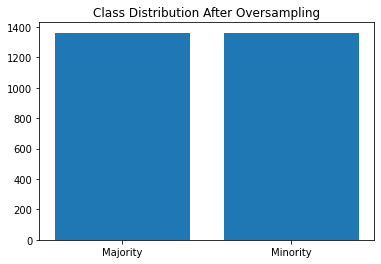

[1362 1362]


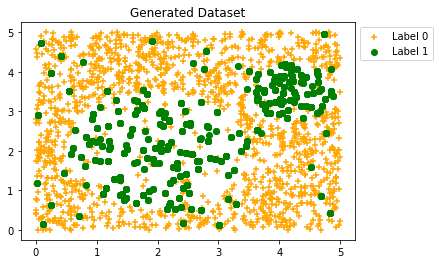

In [5]:
oversampler = RandomOverSampler(sampling_strategy='minority')
samples_ros, labels_ros = oversampler.fit_resample(X_train, y_train)

class_distribution_after = np.bincount(labels_ros)
plt.bar(['Majority', 'Minority'], class_distribution_after)
plt.title("Class Distribution After Oversampling")
plt.show()
print(class_distribution_after)

cmap = plt.get_cmap('viridis')
markers = ['+', 'o']

for label in np.unique(labels_ros):
    mask = labels_ros == label
    color = 'orange' if label == 0 else 'green'
    plt.scatter(samples_ros[mask, 0], samples_ros[mask, 1], c=color, marker=markers[label], label=f'Label {label}')

plt.title("Generated Dataset")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [6]:
# Training
clf = SVC(kernel='rbf', C=1.0)
clf.fit(samples_ros, labels_ros)

# Testing
y_pred = clf.predict(X_test)

# Compute metrics
report = classification_report(y_test, y_pred, target_names=['Majority', 'Minority'])
accuracy = accuracy_score(y_test, y_pred)
print(report)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

    Majority       0.98      0.84      0.91       338
    Minority       0.51      0.90      0.65        62

    accuracy                           0.85       400
   macro avg       0.75      0.87      0.78       400
weighted avg       0.91      0.85      0.87       400

Accuracy: 0.85


# SMOTE

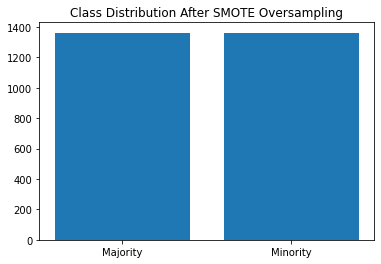

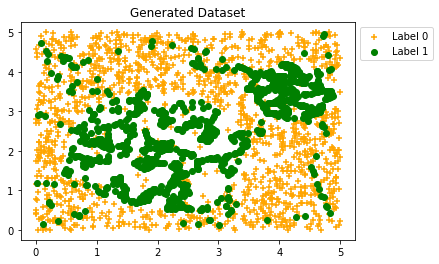

In [7]:
# Set oversampling ratio
os_ratio = 1.0  
oversampler = SMOTE(sampling_strategy = os_ratio)
samples_smote, labels_smote = oversampler.fit_resample(X_train, y_train)

# New data distribution
class_distribution_after = np.bincount(labels_smote)
plt.bar(['Majority', 'Minority'], class_distribution_after)
plt.title("Class Distribution After SMOTE Oversampling")
plt.show()

# New scatter Plot
cmap = plt.get_cmap('viridis')
markers = ['+', 'o']

for label in np.unique(labels_smote):
    mask = labels_smote == label
    color = 'orange' if label == 0 else 'green'
    plt.scatter(samples_smote[mask, 0], samples_smote[mask, 1], c=color, marker=markers[label], label=f'Label {label}')

plt.title("Generated Dataset")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [8]:
# Training
clf = SVC(kernel='rbf', C=1.0)
clf.fit(samples_smote, labels_smote)

# Testing
y_pred = clf.predict(X_test)

# Compute metrics
report = classification_report(y_test, y_pred, target_names=['Majority', 'Minority'])
accuracy = accuracy_score(y_test, y_pred)
print(report)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

    Majority       0.98      0.84      0.90       338
    Minority       0.50      0.89      0.64        62

    accuracy                           0.85       400
   macro avg       0.74      0.86      0.77       400
weighted avg       0.90      0.85      0.86       400

Accuracy: 0.85


# BORDERLINE SMOTE

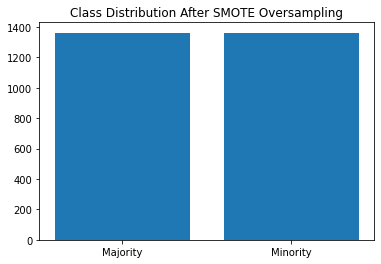

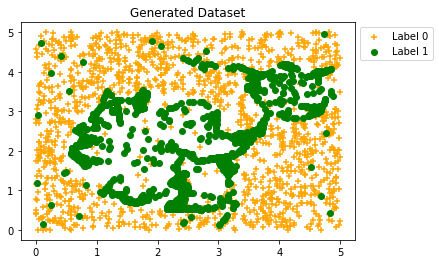

In [9]:
os_ratio = 1.0  
smote = BorderlineSMOTE(sampling_strategy=os_ratio, random_state=42)
samples_bdsm, labels_bdsm = smote.fit_resample(X_train, y_train)

# New data distribution
class_distribution_after = np.bincount(labels_bdsm)
plt.bar(['Majority', 'Minority'], class_distribution_after)
plt.title("Class Distribution After SMOTE Oversampling")
plt.show()

# New scatter plot
cmap = plt.get_cmap('viridis')
markers = ['+', 'o']

for label in np.unique(labels_bdsm):
    mask = labels_bdsm == label
    color = 'orange' if label == 0 else 'green'
    plt.scatter(samples_bdsm[mask, 0], samples_bdsm[mask, 1], c=color, marker=markers[label], label=f'Label {label}')

plt.title("Generated Dataset")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [10]:
# Training
clf = SVC(kernel='rbf', C = 1.0)
clf.fit(samples_bdsm, labels_bdsm)

# Testing
y_pred = clf.predict(X_test)

# Compute metrics
report = classification_report(y_test, y_pred, target_names=['Majority', 'Minority'])
accuracy = accuracy_score(y_test, y_pred)
print(report)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

    Majority       0.98      0.80      0.88       338
    Minority       0.45      0.90      0.60        62

    accuracy                           0.81       400
   macro avg       0.71      0.85      0.74       400
weighted avg       0.90      0.81      0.84       400

Accuracy: 0.81


# BORDERLINE SMOTE 2

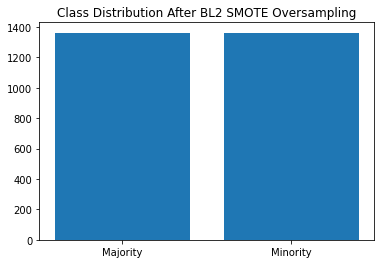

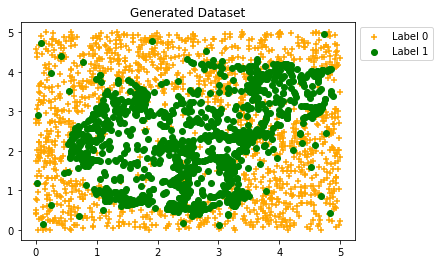

In [11]:
os_ratio = 1.0  
smote = BorderlineSMOTE(sampling_strategy=os_ratio, random_state=42, kind='borderline-2')
samples_bdsm2, labels_bdsm2 = smote.fit_resample(X_train, y_train)

# New data distribution
class_distribution_after = np.bincount(labels_bdsm2)
plt.bar(['Majority', 'Minority'], class_distribution_after)
plt.title("Class Distribution After BL2 SMOTE Oversampling")
plt.show()

# New scatter plot
cmap = plt.get_cmap('viridis')
markers = ['+', 'o']

for label in np.unique(labels_bdsm2):
    mask = labels_bdsm2 == label
    color = 'orange' if label == 0 else 'green'
    plt.scatter(samples_bdsm2[mask, 0], samples_bdsm2[mask, 1], c=color, marker=markers[label], label=f'Label {label}')

plt.title("Generated Dataset")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [12]:
# Training
clf = SVC(kernel='rbf', C = 1.0)
clf.fit(samples_bdsm2, labels_bdsm2)

# Testing
y_pred = clf.predict(X_test)

# Compute metrics
report = classification_report(y_test, y_pred, target_names=['Majority', 'Minority'])
accuracy = accuracy_score(y_test, y_pred)
print(report)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

    Majority       0.98      0.78      0.87       338
    Minority       0.43      0.90      0.59        62

    accuracy                           0.80       400
   macro avg       0.71      0.84      0.73       400
weighted avg       0.89      0.80      0.83       400

Accuracy: 0.80


# SMOTE-TOMEK

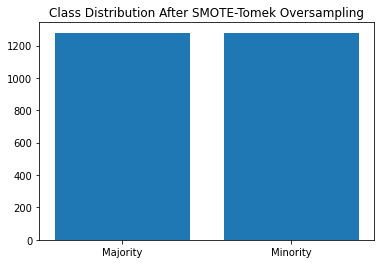

[1279 1279]


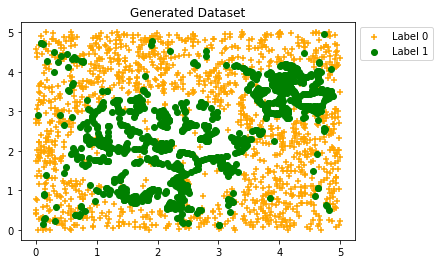

In [13]:
os_ratio = 1.0  
smt = SMOTETomek(sampling_strategy=os_ratio, random_state=42)
samples_tomek, labels_tomek = smt.fit_resample(X_train, y_train)

# New data distribution
class_distribution_after = np.bincount(labels_tomek)
plt.bar(['Majority', 'Minority'], class_distribution_after)
plt.title("Class Distribution After SMOTE-Tomek Oversampling")
plt.show()
print(class_distribution_after)

# New scatter Plot
cmap = plt.get_cmap('viridis')
markers = ['+', 'o']

for label in np.unique(labels_tomek):
    mask = labels_tomek == label
    color = 'orange' if label == 0 else 'green'
    plt.scatter(samples_tomek[mask, 0], samples_tomek[mask, 1], c=color, marker=markers[label], label=f'Label {label}')

plt.title("Generated Dataset")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [14]:
# Training
clf = SVC(kernel='rbf', C=1.0)
clf.fit(samples_tomek, labels_tomek)

# Testing
y_pred = clf.predict(X_test)

# Compute metrics
report = classification_report(y_test, y_pred, target_names=['Majority', 'Minority'])
accuracy = accuracy_score(y_test, y_pred)
print(report)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

    Majority       0.98      0.84      0.91       338
    Minority       0.51      0.90      0.65        62

    accuracy                           0.85       400
   macro avg       0.75      0.87      0.78       400
weighted avg       0.91      0.85      0.87       400

Accuracy: 0.85


# SMOTE-ENN

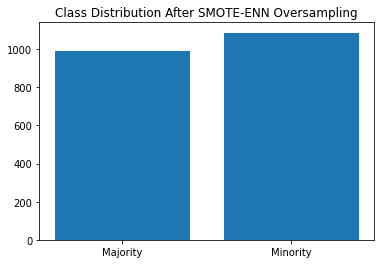

[ 991 1086]


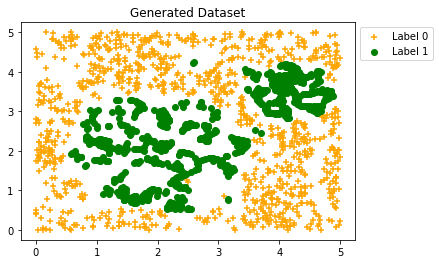

In [15]:
os_ratio = 1.0  
smt = SMOTEENN(sampling_strategy=os_ratio, random_state=42)
samples_enn, labels_enn = smt.fit_resample(X_train, y_train)

# New data distribution
class_distribution_after = np.bincount(labels_enn)
plt.bar(['Majority', 'Minority'], class_distribution_after)
plt.title("Class Distribution After SMOTE-ENN Oversampling")
plt.show()
print(class_distribution_after)

# New scatter plot
cmap = plt.get_cmap('viridis')
markers = ['+', 'o']

for label in np.unique(labels_enn):
    mask = labels_enn == label
    color = 'orange' if label == 0 else 'green'
    plt.scatter(samples_enn[mask, 0], samples_enn[mask, 1], c=color, marker=markers[label], label=f'Label {label}')

plt.title("Generated Dataset")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [16]:
# Training
clf = SVC(kernel='rbf', C=1.0)
clf.fit(samples_enn, labels_enn)

# Testing
y_pred = clf.predict(X_test)

# Compute metrics
report = classification_report(y_test, y_pred, target_names=['Majority', 'Minority'])
accuracy = accuracy_score(y_test, y_pred)
print(report)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

    Majority       0.98      0.85      0.91       338
    Minority       0.52      0.90      0.66        62

    accuracy                           0.86       400
   macro avg       0.75      0.88      0.79       400
weighted avg       0.91      0.86      0.87       400

Accuracy: 0.86


# ADASYN

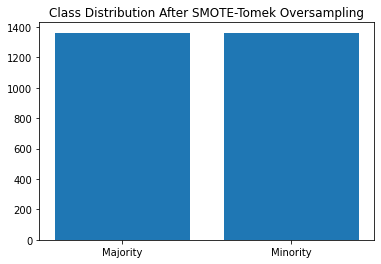

[1362 1359]


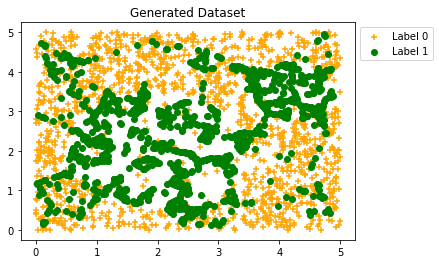

In [17]:
os_ratio = 1.0  
smt = ADASYN(sampling_strategy=os_ratio, random_state=42)
samples_ada, labels_ada = smt.fit_resample(X_train, y_train)

# New Data distribution
class_distribution_after = np.bincount(labels_ada)
plt.bar(['Majority', 'Minority'], class_distribution_after)
plt.title("Class Distribution After SMOTE-Tomek Oversampling")
plt.show()
print(class_distribution_after)

# New scatter plot
cmap = plt.get_cmap('viridis')
markers = ['+', 'o']

for label in np.unique(labels_ada):
    mask = labels_ada == label
    color = 'orange' if label == 0 else 'green'
    plt.scatter(samples_ada[mask, 0], samples_ada[mask, 1], c=color, marker=markers[label], label=f'Label {label}')

plt.title("Generated Dataset")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [18]:
clf = SVC(kernel='rbf', C=1.0)
clf.fit(samples_ada, labels_ada)
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['Majority', 'Minority'])
accuracy = accuracy_score(y_test, y_pred)
print(report)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

    Majority       0.98      0.81      0.89       338
    Minority       0.47      0.90      0.62        62

    accuracy                           0.82       400
   macro avg       0.72      0.86      0.75       400
weighted avg       0.90      0.82      0.84       400

Accuracy: 0.82


c:\Users\Deependra Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


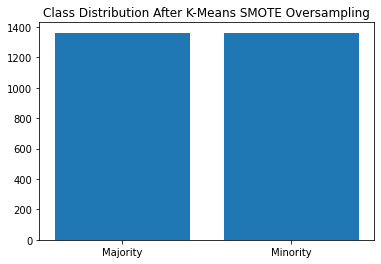

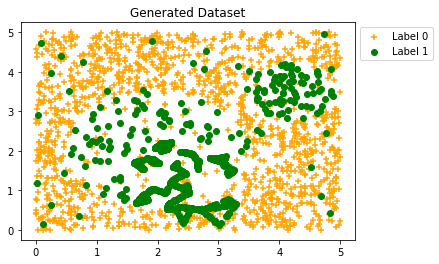

In [29]:
from imblearn.over_sampling import KMeansSMOTE
os_ratio = 1.0 
kmeans_smote = KMeansSMOTE(sampling_strategy=os_ratio, cluster_balance_threshold=0.3, random_state=42)
samples_kms, labels_kms = kmeans_smote.fit_resample(X_train, y_train)

class_distribution_after = np.bincount(labels_kms)
plt.bar(['Majority', 'Minority'], class_distribution_after)
plt.title("Class Distribution After K-Means SMOTE Oversampling")
plt.show()

cmap = plt.get_cmap('viridis')
markers = ['+', 'o']

for label in np.unique(labels_kms):
    mask = labels_kms == label
    color = 'orange' if label == 0 else 'green'
    plt.scatter(samples_kms[mask, 0], samples_kms[mask, 1], c=color, marker=markers[label], label=f'Label {label}')

plt.title("Generated Dataset")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [30]:
clf = SVC(kernel='rbf', C=1.0)
clf.fit(samples_kms, labels_kms)
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['Majority', 'Minority'])
accuracy = accuracy_score(y_test, y_pred)
print(report)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

    Majority       0.89      0.93      0.91       338
    Minority       0.50      0.39      0.44        62

    accuracy                           0.84       400
   macro avg       0.70      0.66      0.67       400
weighted avg       0.83      0.84      0.84       400

Accuracy: 0.84


# RESULTS

**[Result of No Oversampling]**

|       Metric       |   Majority   |   Minority   |  Weighted Avg  |  Macro Avg  |
|--------------------|:------------:|:------------:|:-------------:|:----------:|
|     Precision      |     0.88     |     0.64     |     0.84      |    0.76    |
|       Recall       |     0.97     |     0.26     |     0.86      |    0.62    |
|     F1-Score       |     0.92     |     0.37     |     0.84      |    0.65    |
|     Support        |     338      |     62       |               |           |
|     Accuracy       |     0.86     |              |               |           |

**[Result of ROS]**

|       Metric       |   Majority   |   Minority   |  Weighted Avg  |  Macro Avg  |
|--------------------|:------------:|:------------:|:-------------:|:----------:|
|     Precision      |     0.98     |     0.51     |     0.91      |    0.75    |
|       Recall       |     0.84     |     0.90     |     0.85      |    0.87    |
|     F1-Score       |     0.91     |     0.65     |     0.87      |    0.78    |
|     Support        |     338      |     62       |               |           |
|     Accuracy       |     0.85     |              |               |           |

**[Result of SMOTE]**

|       Metric       |   Majority   |   Minority   |  Weighted Avg  |  Macro Avg  |
|--------------------|:------------:|:------------:|:-------------:|:----------:|
|     Precision      |     0.98     |     0.50     |     0.90      |    0.74    |
|       Recall       |     0.84     |     0.89     |     0.85      |    0.86    |
|     F1-Score       |     0.90     |     0.64     |     0.86      |    0.77    |
|     Support        |     338      |     62       |               |           |
|     Accuracy       |     0.85     |              |               |           |

**[Result of BLSM1]**

|       Metric       |   Majority   |   Minority   |  Weighted Avg  |  Macro Avg  |
|--------------------|:------------:|:------------:|:-------------:|:----------:|
|     Precision      |     0.98     |     0.45     |     0.81      |    0.71    |
|       Recall       |     0.80     |     0.90     |     0.84      |    0.85    |
|     F1-Score       |     0.88     |     0.60     |     0.83      |    0.74    |
|     Support        |     338      |     62       |               |           |
|     Accuracy       |     0.81     |              |               |           |

**[Result of BLSM2]**

|       Metric       |   Majority   |   Minority   |  Weighted Avg  |  Macro Avg  |
|--------------------|:------------:|:------------:|:-------------:|:----------:|
|     Precision      |     0.98     |     0.43     |     0.80      |    0.71    |
|       Recall       |     0.78     |     0.90     |     0.83      |    0.84    |
|     F1-Score       |     0.87     |     0.59     |     0.82      |    0.73    |
|     Support        |     338      |     62       |               |           |
|     Accuracy       |     0.80     |              |               |           |

**[Result of SMOTE-TOMEK]**

|       Metric       |   Majority   |   Minority   |  Weighted Avg  |  Macro Avg  |
|--------------------|:------------:|:------------:|:-------------:|:----------:|
|     Precision      |     0.98     |     0.51     |     0.91      |    0.75    |
|       Recall       |     0.84     |     0.90     |     0.85      |    0.87    |
|     F1-Score       |     0.91     |     0.65     |     0.87      |    0.78    |
|     Support        |     338      |     62       |               |           |
|     Accuracy       |     0.85     |              |               |           |

**[Result of SMOTE-ENN]**

|       Metric       |   Majority   |   Minority   |  Weighted Avg  |  Macro Avg  |
|--------------------|:------------:|:------------:|:-------------:|:----------:|
|     Precision      |     0.98     |     0.52     |     0.91      |    0.75    |
|       Recall       |     0.85     |     0.90     |     0.86      |    0.88    |
|     F1-Score       |     0.91     |     0.66     |     0.87      |    0.79    |
|     Support        |     338      |     62       |               |           |
|     Accuracy       |     0.86     |              |               |           |

**[Result of ADASYN]**

|       Metric       |   Majority   |   Minority   |  Weighted Avg  |  Macro Avg  |
|--------------------|:------------:|:------------:|:-------------:|:----------:|
|     Precision      |     0.98     |     0.47     |     0.88      |    0.72    |
|       Recall       |     0.81     |     0.90     |     0.82      |    0.86    |
|     F1-Score       |     0.89     |     0.62     |     0.84      |    0.75    |
|     Support        |     338      |     62       |               |           |
|     Accuracy       |     0.82     |              |               |           |

**[Result of KMEANS SMOTE]**

|       Metric       |   Majority   |   Minority   |  Weighted Avg  |  Macro Avg  |
|--------------------|:------------:|:------------:|:-------------:|:----------:|
|     Precision      |     0.89     |     0.50     |     0.84      |    0.70    |
|       Recall       |     0.93     |     0.39     |     0.84      |    0.66    |
|     F1-Score       |     0.91     |     0.44     |     0.84      |    0.67    |
|     Support        |     338      |     62       |               |           |
|     Accuracy       |     0.84     |              |               |           |


# SMOTE-NC

<AxesSubplot:>

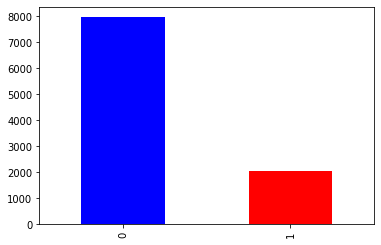

In [19]:
df = pd.read_csv('churn.csv')
df['Exited'].value_counts().plot(kind = 'bar', color = ['blue', 'red'])

In [20]:
pd.crosstab(df['HasCrCard'], df['Exited'])

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


In [21]:
smotenc = SMOTENC([1],random_state = 42)
X_os_nc, y_os_nc = smotenc.fit_resample(df[['Age', 'HasCrCard']], df['Exited'])

In [22]:
pd.crosstab(X_os_nc['HasCrCard'], y_os_nc)

Exited,0,1
HasCrCard,,
0,2332,2357
1,5631,5606
